In [16]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import matplotlib.pyplot as plt


In [3]:
tsla = yf.Ticker("TSLA")

tsla_data = tsla.history(period="1y")

tsla_data.reset_index(inplace=True)
tsla_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-13 00:00:00-04:00,208.300003,222.990005,206.220001,221.720001,91483000,0.0,0.0
1,2022-10-14 00:00:00-04:00,224.009995,226.259995,204.160004,204.990005,94124500,0.0,0.0
2,2022-10-17 00:00:00-04:00,210.039993,221.860001,209.449997,219.350006,79428800,0.0,0.0
3,2022-10-18 00:00:00-04:00,229.500000,229.820007,217.250000,220.190002,75891900,0.0,0.0
4,2022-10-19 00:00:00-04:00,219.800003,222.929993,217.779999,222.039993,66571500,0.0,0.0


In [4]:
url = "https://backlinko.com/tesla-stats#tesla-annual-revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")



In [17]:
table = pd.read_html(response.text, attrs={'class':"table table-primary table-striped table-hover"})

tesla_annual_revenue = table[2]
tesla_annual_revenue.tail()

,Year,Annual revenue
9,2017,$11.76 billion
10,2018,$21.46 billion
11,2019,$24.58 billion
12,2020,$31.54 billion
13,2021 (Q1+Q2),$22.35 billion


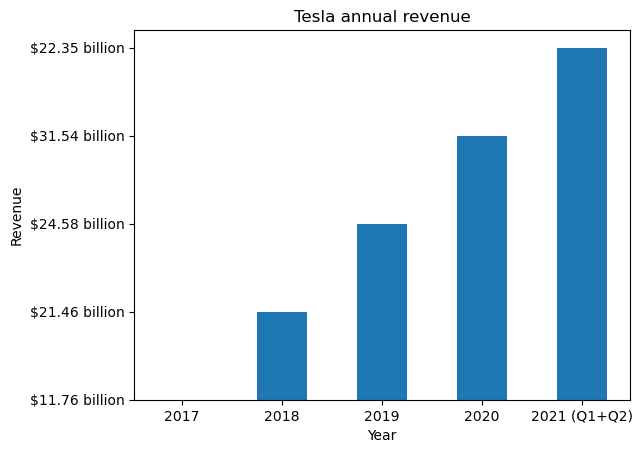

In [21]:
y1 = tesla_annual_revenue.tail()["Annual revenue"]
x1 = tesla_annual_revenue.tail()["Year"]

plt.bar(x1, y1, width=0.5)
plt.title('Tesla annual revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()


In [12]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="1y")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-13 00:00:00-04:00,24.420000,26.590000,23.910000,25.559999,3516200,0.0,0.0
1,2022-10-14 00:00:00-04:00,25.770000,26.370001,24.629999,24.629999,2773500,0.0,0.0
2,2022-10-17 00:00:00-04:00,25.370001,26.410000,25.240000,25.959999,3172200,0.0,0.0
3,2022-10-18 00:00:00-04:00,27.100000,27.740000,26.129999,26.670000,4402600,0.0,0.0
4,2022-10-19 00:00:00-04:00,26.000000,26.180000,24.270000,24.540001,5318400,0.0,0.0


In [13]:
gamestop_url = "https://companiesmarketcap.com/gamestop/revenue/#:~:text=According%20to%20GameStop%20's%20latest,sale%20of%20goods%20or%20services."
response2 = requests.get(gamestop_url)

table2 = pd.read_html(response2.text, attrs={'class':"table"})

gamestop_annual_revenue = table2[0]
gamestop_annual_revenue_year_revenue = gamestop_annual_revenue[['Year','Revenue']]
gamestop_annual_revenue_year_revenue

,Year,Revenue
17,2006,$4.68 B
18,2005,$2.13 B
19,2004,$1.75 B
20,2003,$1.47 B
21,2002,$1.34 B


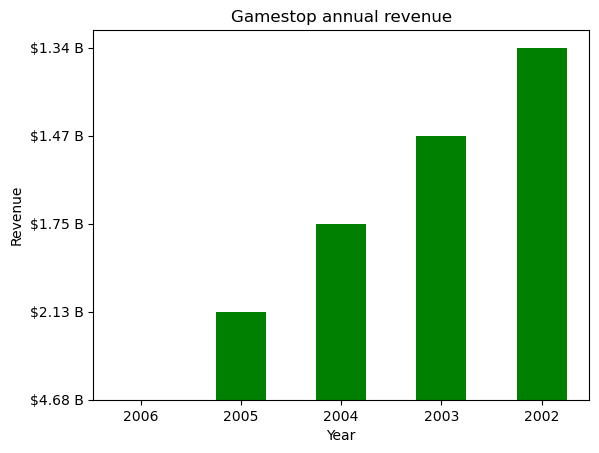

In [23]:
y2 = gamestop_annual_revenue_year_revenue.tail()["Revenue"]
x2 = gamestop_annual_revenue_year_revenue.tail()["Year"]

plt.bar(x2, y2, width=0.5,color="green")
plt.title('Gamestop annual revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()


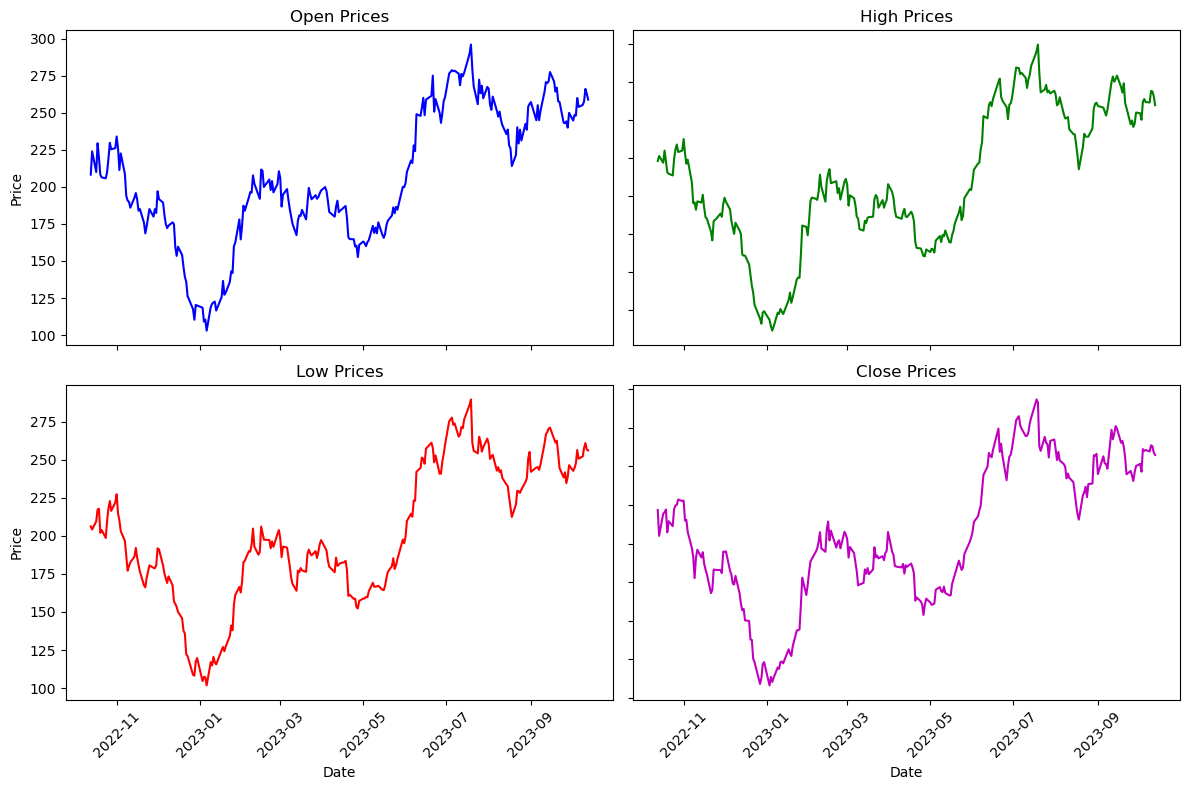

In [9]:
dates = tsla_data['Date']
open_prices = tsla_data['Open']
high_prices = tsla_data['High']
low_prices = tsla_data['Low']
close_prices = tsla_data['Close']
volume = tsla_data['Volume']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot open prices
axs[0, 0].plot(dates, open_prices, color='b')
axs[0, 0].set_title('Open Prices')

# Plot high prices
axs[0, 1].plot(dates, high_prices, color='g')
axs[0, 1].set_title('High Prices')

# Plot low prices
axs[1, 0].plot(dates, low_prices, color='r')
axs[1, 0].set_title('Low Prices')

# Plot close prices
axs[1, 1].plot(dates, close_prices, color='m')
axs[1, 1].set_title('Close Prices')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.label_outer()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

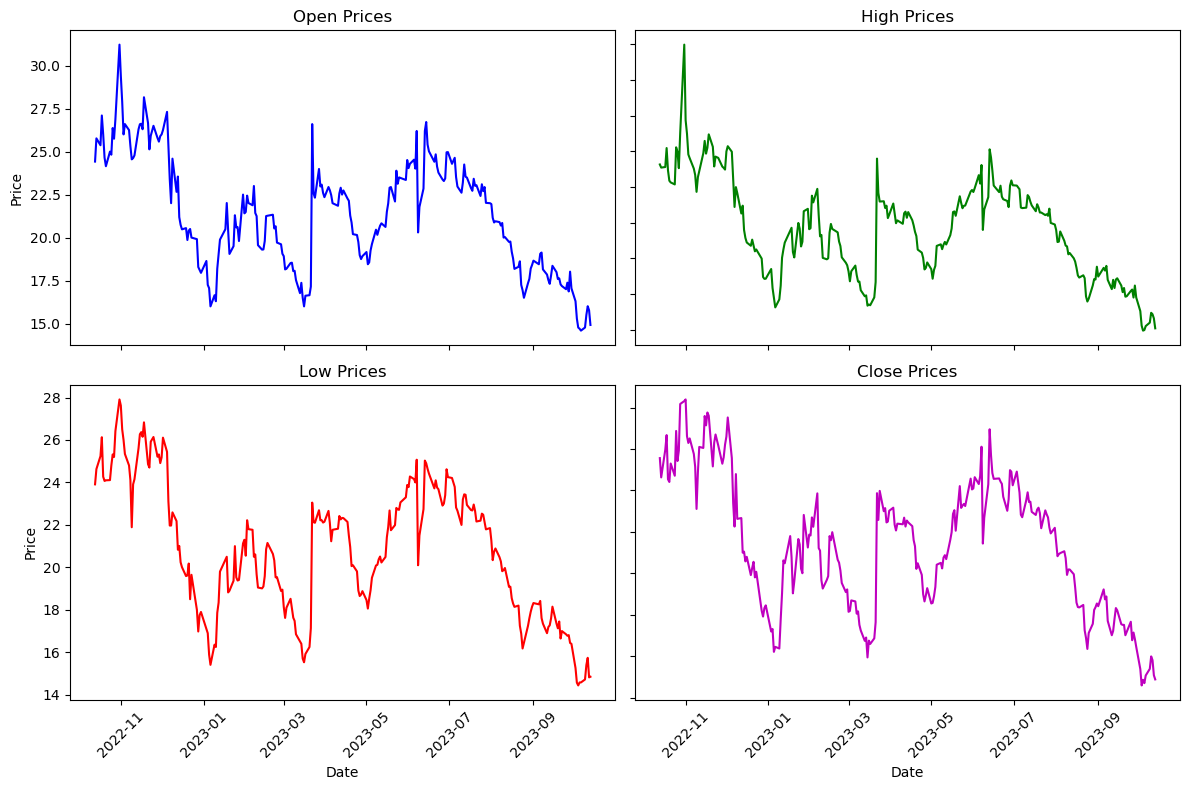

In [10]:
dates2 = gme_data['Date']
open_prices2 = gme_data['Open']
high_prices2 = gme_data['High']
low_prices2 = gme_data['Low']
close_prices2 = gme_data['Close']
volume2 = gme_data['Volume']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot open prices
axs[0, 0].plot(dates2, open_prices2, color='b')
axs[0, 0].set_title('Open Prices')

# Plot high prices
axs[0, 1].plot(dates2, high_prices2, color='g')
axs[0, 1].set_title('High Prices')

# Plot low prices
axs[1, 0].plot(dates2, low_prices2, color='r')
axs[1, 0].set_title('Low Prices')

# Plot close prices
axs[1, 1].plot(dates2, close_prices2, color='m')
axs[1, 1].set_title('Close Prices')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.label_outer()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()